In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir("D:/Projects/ML/Traffic sign classsification")
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [71]:
data = []
labels = []

classes = 43
cur_path = os.getcwd()

In [72]:
cur_path

'D:\\Projects\\ML\\Traffic sign classsification'

In [73]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)    

Converting Lists into numpy arrays

In [74]:
data = np.array(data)
labels = np.array(labels)

Save Labels & Data for Future use

In [75]:
np.save('./training/data',data)
np.save('./training/target',labels)

Load data & Labels

In [76]:
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [77]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [78]:
X_train , X_test , y_train , y_test = train_test_split(data, labels, test_size=0.3, random_state=0)

In [79]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27446, 30, 30, 3) (11763, 30, 30, 3) (27446,) (11763,)


Convert labels to onehot encoding

In [80]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Now it's time to build the model

In [81]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5),activation='relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [82]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
858/858 [==============================] - 62s 68ms/step - loss: 2.0027 - accuracy: 0.4858 - val_loss: 0.4528 - val_accuracy: 0.8884
Epoch 2/20
858/858 [==============================] - 58s 67ms/step - loss: 0.6262 - accuracy: 0.8176 - val_loss: 0.2034 - val_accuracy: 0.9434
Epoch 3/20
858/858 [==============================] - 59s 68ms/step - loss: 0.4073 - accuracy: 0.8833 - val_loss: 0.1652 - val_accuracy: 0.9580
Epoch 4/20
858/858 [==============================] - 59s 69ms/step - loss: 0.3349 - accuracy: 0.9053 - val_loss: 0.0849 - val_accuracy: 0.9759
Epoch 5/20
858/858 [==============================] - 60s 70ms/step - loss: 0.2836 - accuracy: 0.9208 - val_loss: 0.0822 - val_accuracy: 0.9766
Epoch 6/20
858/858 [==============================] - 59s 69ms/step - loss: 0.2785 - accuracy: 0.9213 - val_loss: 0.0714 - val_accuracy: 0.9797
Epoch 7/20
858/858 [==============================] - 60s 70ms/step - loss: 0.2337 - accuracy: 0.9357 - val_loss: 0.0653 - val_accuracy:

# Visualization 

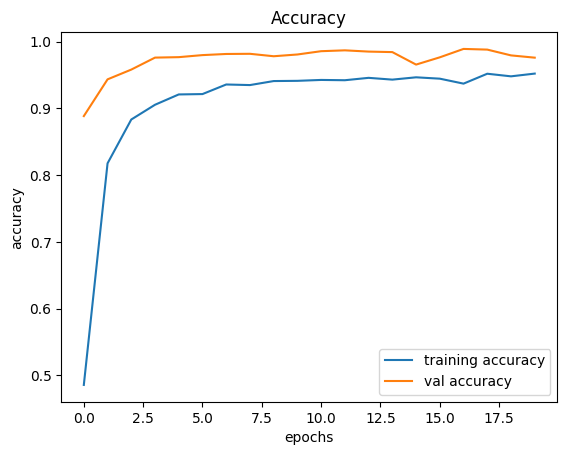

In [84]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

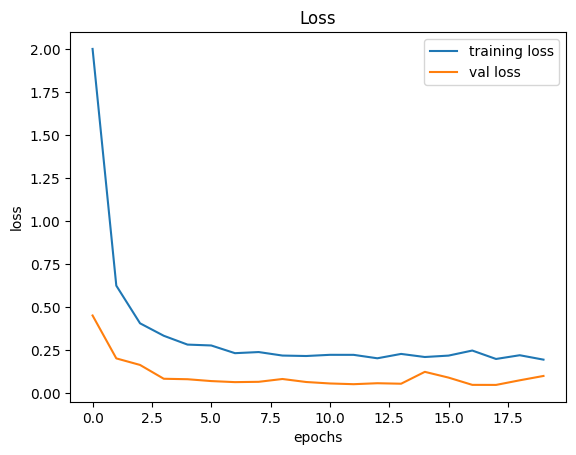

In [85]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Let's do testing on Test data

In [86]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [87]:
X_test, label = testing('Test.csv')

In [88]:
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_pred

395/395 [==============================] - 7s 17ms/step


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

Accuracy with the test data

In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9356294536817102


Save the model

In [90]:
model.save("./training/TSR.h5")

c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Load the Model

In [1]:
import os
import gradio as gd
os.chdir("D:/Projects/ML/Traffic sign classsification")
from keras.models import load_model
model = load_model('./training/TSR.h5')

c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=1)
    return image,Y_pred

Interface

In [5]:
def gui_gp(img):
    plot, prediction = test_on_img(img)
    s = [str(i) for i in prediction]
    a = int("".join(s))
    print(a)
    return classes[a],plot
    #except AttributeError:
      #pass

In [9]:
gui = gd.Interface(fn = gui_gp,
                   inputs = "text",
                   outputs = ["text","image"],
                   title = "Traffic sign Classification",
                   theme = "Soft",
                   allow_flagging = "never")
gui.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 43ms/step
25


In [8]:
plot,prediction = test_on_img("D:/Projects/ML/Traffic sign classsification/Test/00051.png")
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 42ms/step
Predicted traffic sign is:  Yield


<Figure size 640x480 with 1 Axes>

In [97]:
import keras as k
k.__version__

'2.14.0'

1/1 [==============================] - 0s 65ms/step
9
